Develop A Neural Network That Can Read Handwriting

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for Conv2D
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


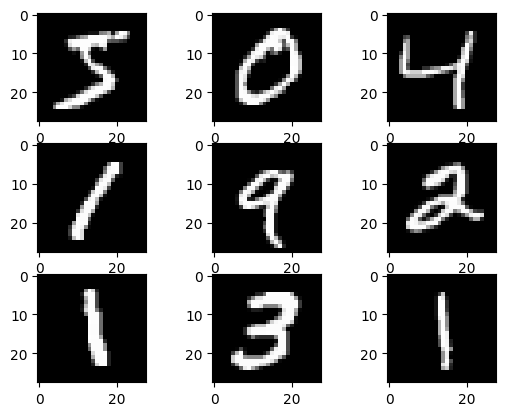

In [ ]:
#plotting the dataset

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 43s 110ms/step - loss: 0.2389 - accuracy: 0.9295 - val_loss: 0.0812 - val_accuracy: 0.9755
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 3/10
375/375 [==============================] - 42s 111ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 4/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0428 - val_accuracy: 0.9888
Epoch 6/10
375/375 [==============================] - 40s 107ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 7/10
375/375 [==============================] - 41s 108ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0369 - val_ac

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


313/313 [==============================] - 3s 9ms/step - loss: 0.0360 - accuracy: 0.9899
Test Accuracy: 98.99%


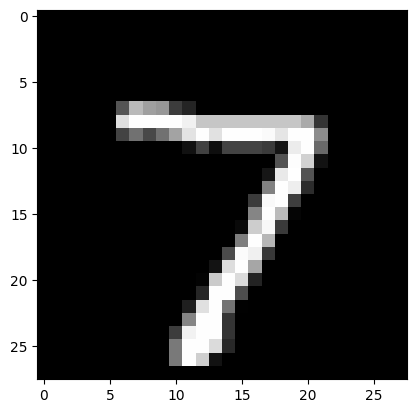

1/1 [==============================] - 0s 58ms/step
Predicted digit: 7


In [ ]:
# Predicting a single image
import numpy as np
import matplotlib.pyplot as plt

# Select a test image
index = 0
img = x_test[index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the digit
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_digit = np.argmax(prediction)
print(f'Predicted digit: {predicted_digit}')
